## Import modules


In [1]:
#Import Required Packages
import pandas as pd 
import numpy as np 
import os
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import StandardScaler
#!pip uninstall scikit-learn --yes
#!pip uninstall imbalanced-learn --yes
#!pip install scikit-learn==1.2.2
#!pip install imbalanced-learn==0.10.1

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#!pip install xgboost
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

## Loading the Dataset

In [2]:
# load the csv data
os.getcwd()
os.chdir("C:/Users/haris/Downloads")
df = pd.read_csv("creditcard.csv")

## Data Processing and EDA

In [3]:
# View initial data
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Print the shape of the data
print(df.shape)

(284807, 31)


In [5]:
# statistical info
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.759061e-12,-8.251130e-13,-9.654937e-13,8.321385e-13,1.649999e-13,4.248366e-13,-3.054600e-13,8.777971e-14,-1.179749e-12,...,-3.405756e-13,-5.723197e-13,-9.725856e-13,1.464150e-12,-6.987102e-13,-5.617874e-13,3.332082e-12,-3.518874e-12,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Due to the sizeable difference in the range of column (min) & (max), we need to run a standard scalar transformation later.

In [6]:
# prints information about the DataFrame. The information contains the number of columns, column labels, column data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#Check for missing values
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

- There are no NULL values present in the dataset

In [8]:
# To list columns
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

- The only non-transformed variables to work with are:
1. Time
2. Amount
3. Class (1: fraud, 0: non_fraud)

In [12]:
# Determine number of fraud cases in dataset
fraud = df[df['Class'] == 1]
valid = df[df['Class'] == 0]
outlierFraction = len(fraud)/float(len(valid))
print(outlierFraction)
print('Fraud Transactions: {}'.format(len(df[df['Class'] == 1])))
print('Non-Fraud Transactions: {}'.format(len(df[df['Class'] == 0])))

0.0017304750013189597
Fraud Transactions: 492
Non-Fraud Transactions: 284315


- Only 0.17% fraudulent transaction out all the transactions. The data is highly imbalanced. Most of the transactions are non-fraud. If we use this dataframe as the base for our predictive models and analysis we might get a lot of errors and our algorithms will probably overfit since it will "assume" that most transactions are not fraud. So we want our model to get balanced inorder to detect patterns that give signs of fraud.

Text(0, 0.5, 'Frequency')

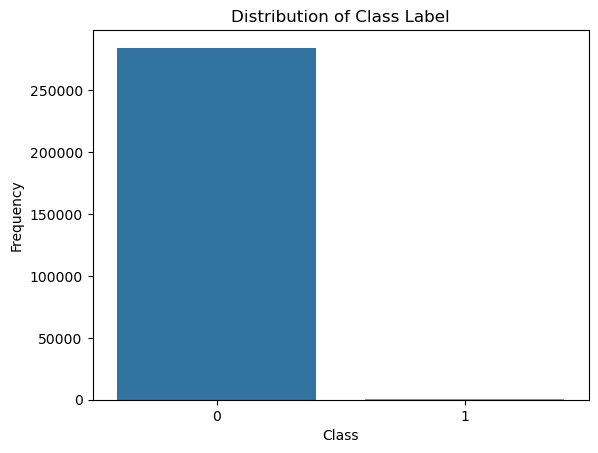

In [17]:
#explore the categorical column "Class"
class_count = pd.value_counts(df['Class'], sort = True).sort_index()
sns.countplot(x="Class", data=df)
plt.title("Distribution of Class Label")
plt.xlabel("Class")
plt.ylabel("Frequency")

- The number of fraudulent classes is low.
- Hence, we need to balance the data for reasonable results.

In [18]:
#How different are the amount of money used in different transaction classes?
pd.concat([fraud.Amount.describe(), valid.Amount.describe()], axis=1)

,Amount,Amount
count,492.000000,284315.000000
mean,122.211321,88.291022
std,256.683288,250.105092
min,0.000000,0.000000
25%,1.000000,5.650000
50%,9.250000,22.000000
75%,105.890000,77.050000
max,2125.870000,25691.160000


- While seeing the statistics, it is seen that the values in the ‘Amount’ variable are varying enormously when compared to the rest of the variables. To reduce its wide range of values, we can normalize it using the ‘StandardScaler’ method in python.As we can notice from this, the average money transaction for the fraudulent ones is more. It makes this problem crucial to deal with.

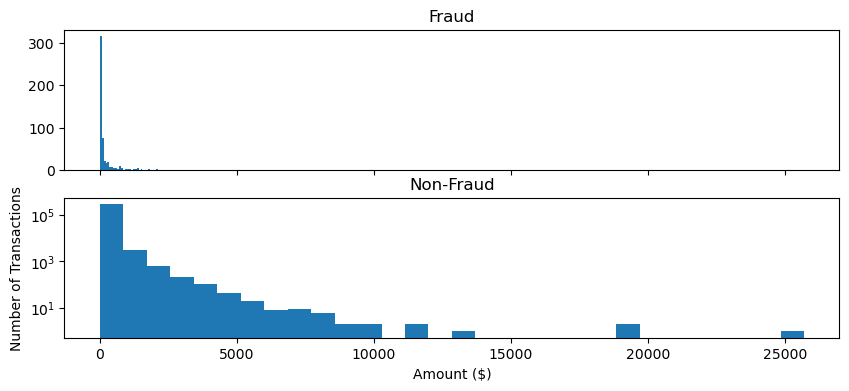

In [21]:
#To display Amount feature distribution over Fraudulent vs Non-Fraudulent Transactions
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('Non-Fraud')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

- Due to the irregularities in range, we need to pass Amount data into Standard Scalar.

In [25]:
#Do fraudulent transactions occur more often during certain time frame?
pd.concat([fraud.Time.describe(), valid.Time.describe()], axis=1)

,Time,Time
count,492.000000,284315.000000
mean,80746.806911,94838.202258
std,47835.365138,47484.015786
min,406.000000,0.000000
25%,41241.500000,54230.000000
50%,75568.500000,84711.000000
75%,128483.000000,139333.000000
max,170348.000000,172792.000000


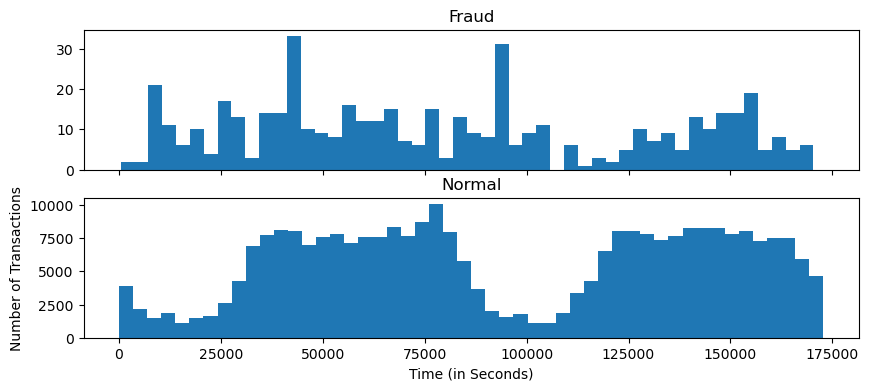

In [26]:
#To display Time feature distribution over Fraudulent vs Non-Fraudulent Transactions
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(10,4))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

- The 'Time' feature looks pretty similar across both types of transactions. You could argue that fraudulent transactions are more uniformly distributed, while normal transactions have a cyclical distribution. This could make it easier to detect a fraudulent transaction during at an 'off-peak' time.

Text(0.5, 1.0, 'Distribution of Input Attributes')

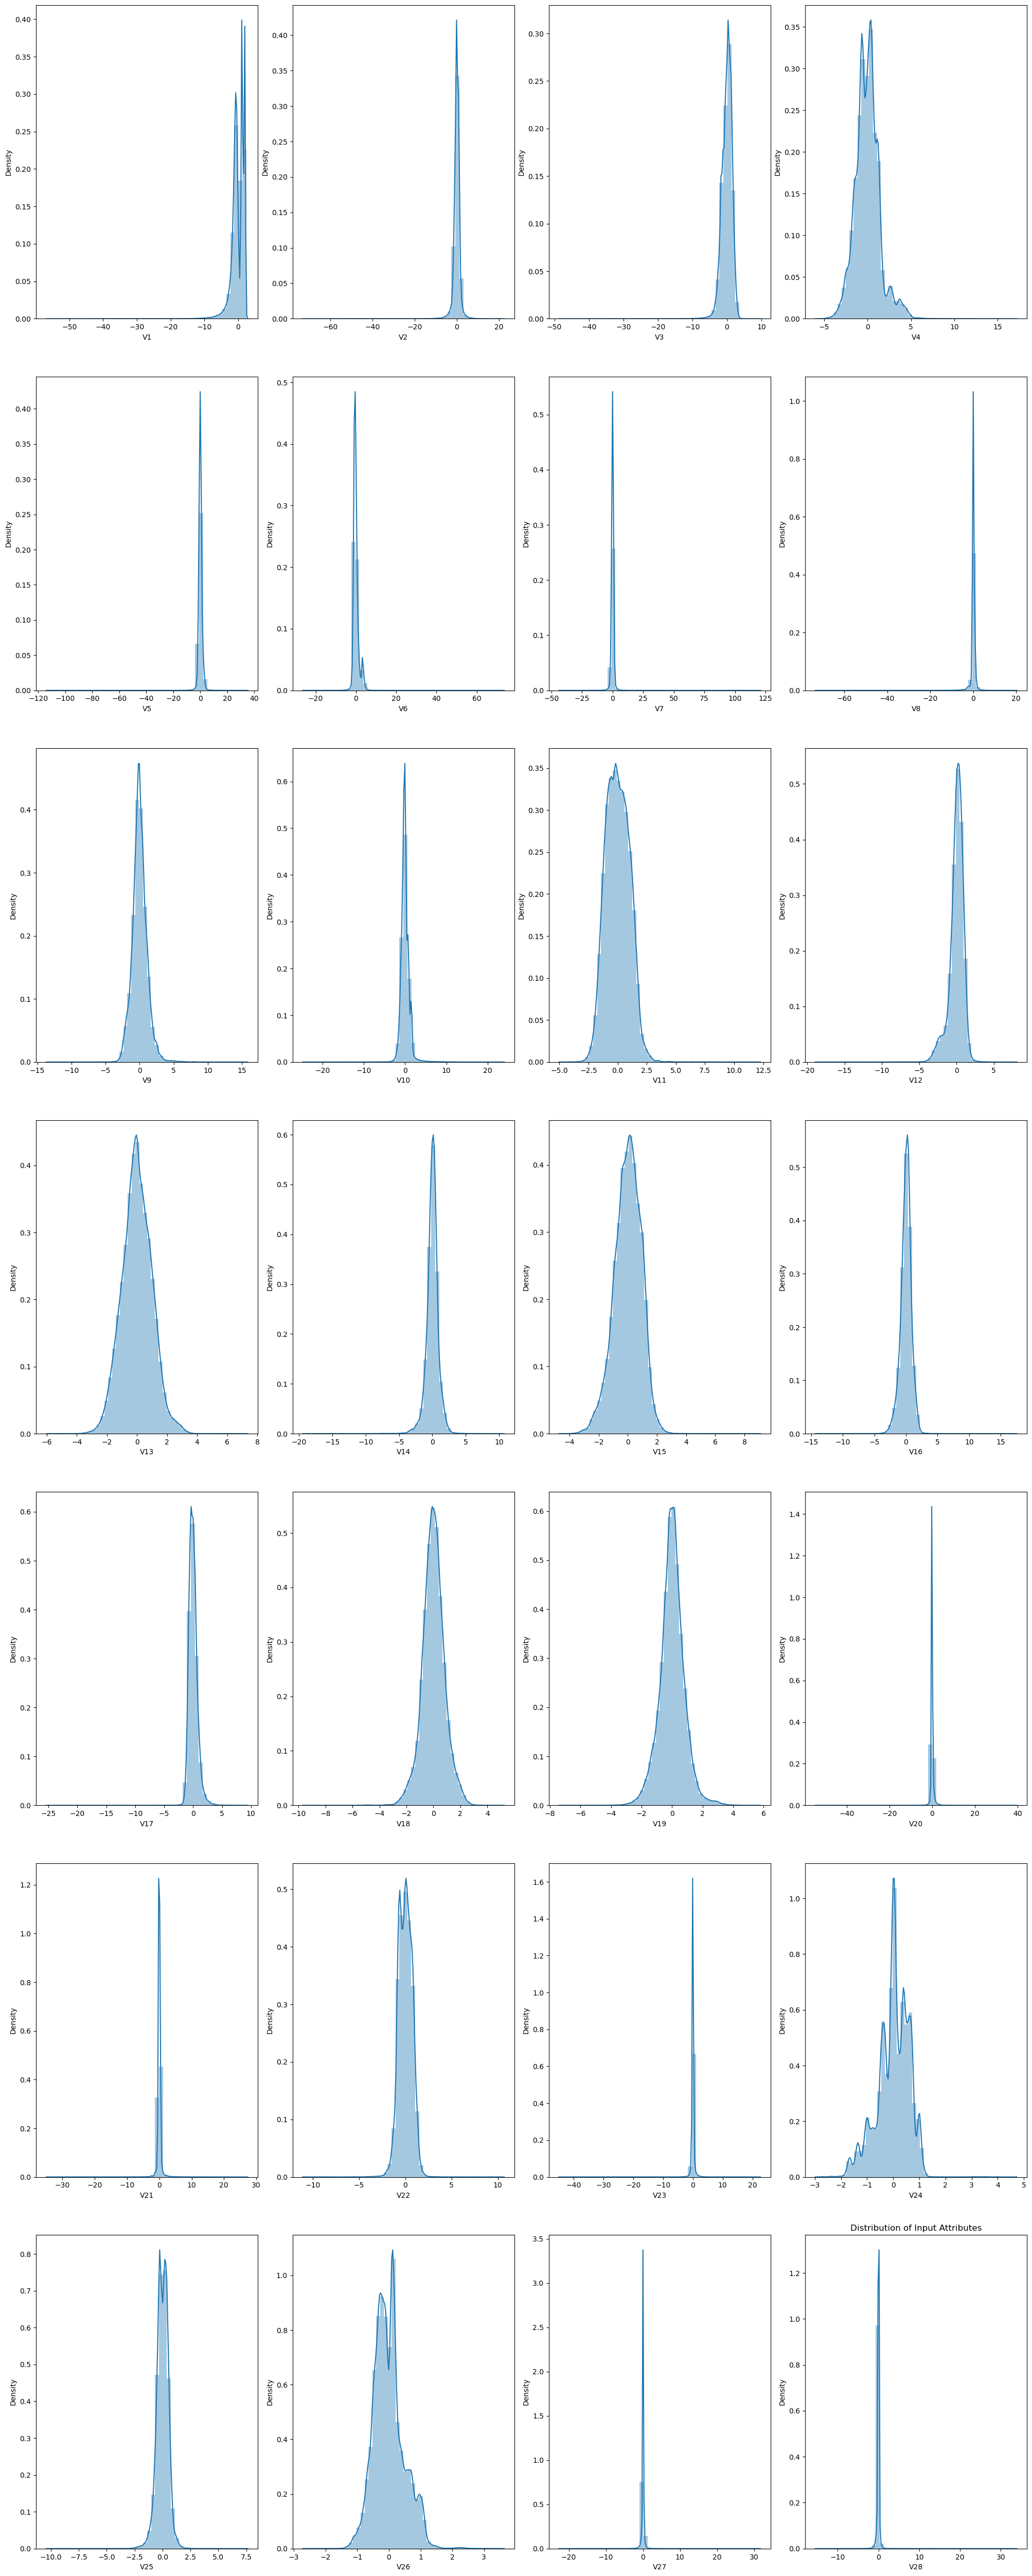

In [27]:
#To display all the 28 PCA columns, we need to run a loop
df_temp = df.drop(columns=['Time', 'Amount', 'Class'], axis=1)

# create dist plots
fig, ax = plt.subplots(ncols=4, nrows=7, figsize=(20, 50))
index = 0
ax = ax.flatten()

for col in df_temp.columns:
    sns.distplot(df_temp[col], ax=ax[index])
    index += 1
plt.tight_layout(pad=0.5, w_pad=0.5, h_pad=5)
plt.title("Distribution of Input Attributes")

- Most columns show a bell curve (Normal Distribution), which does not require processing.

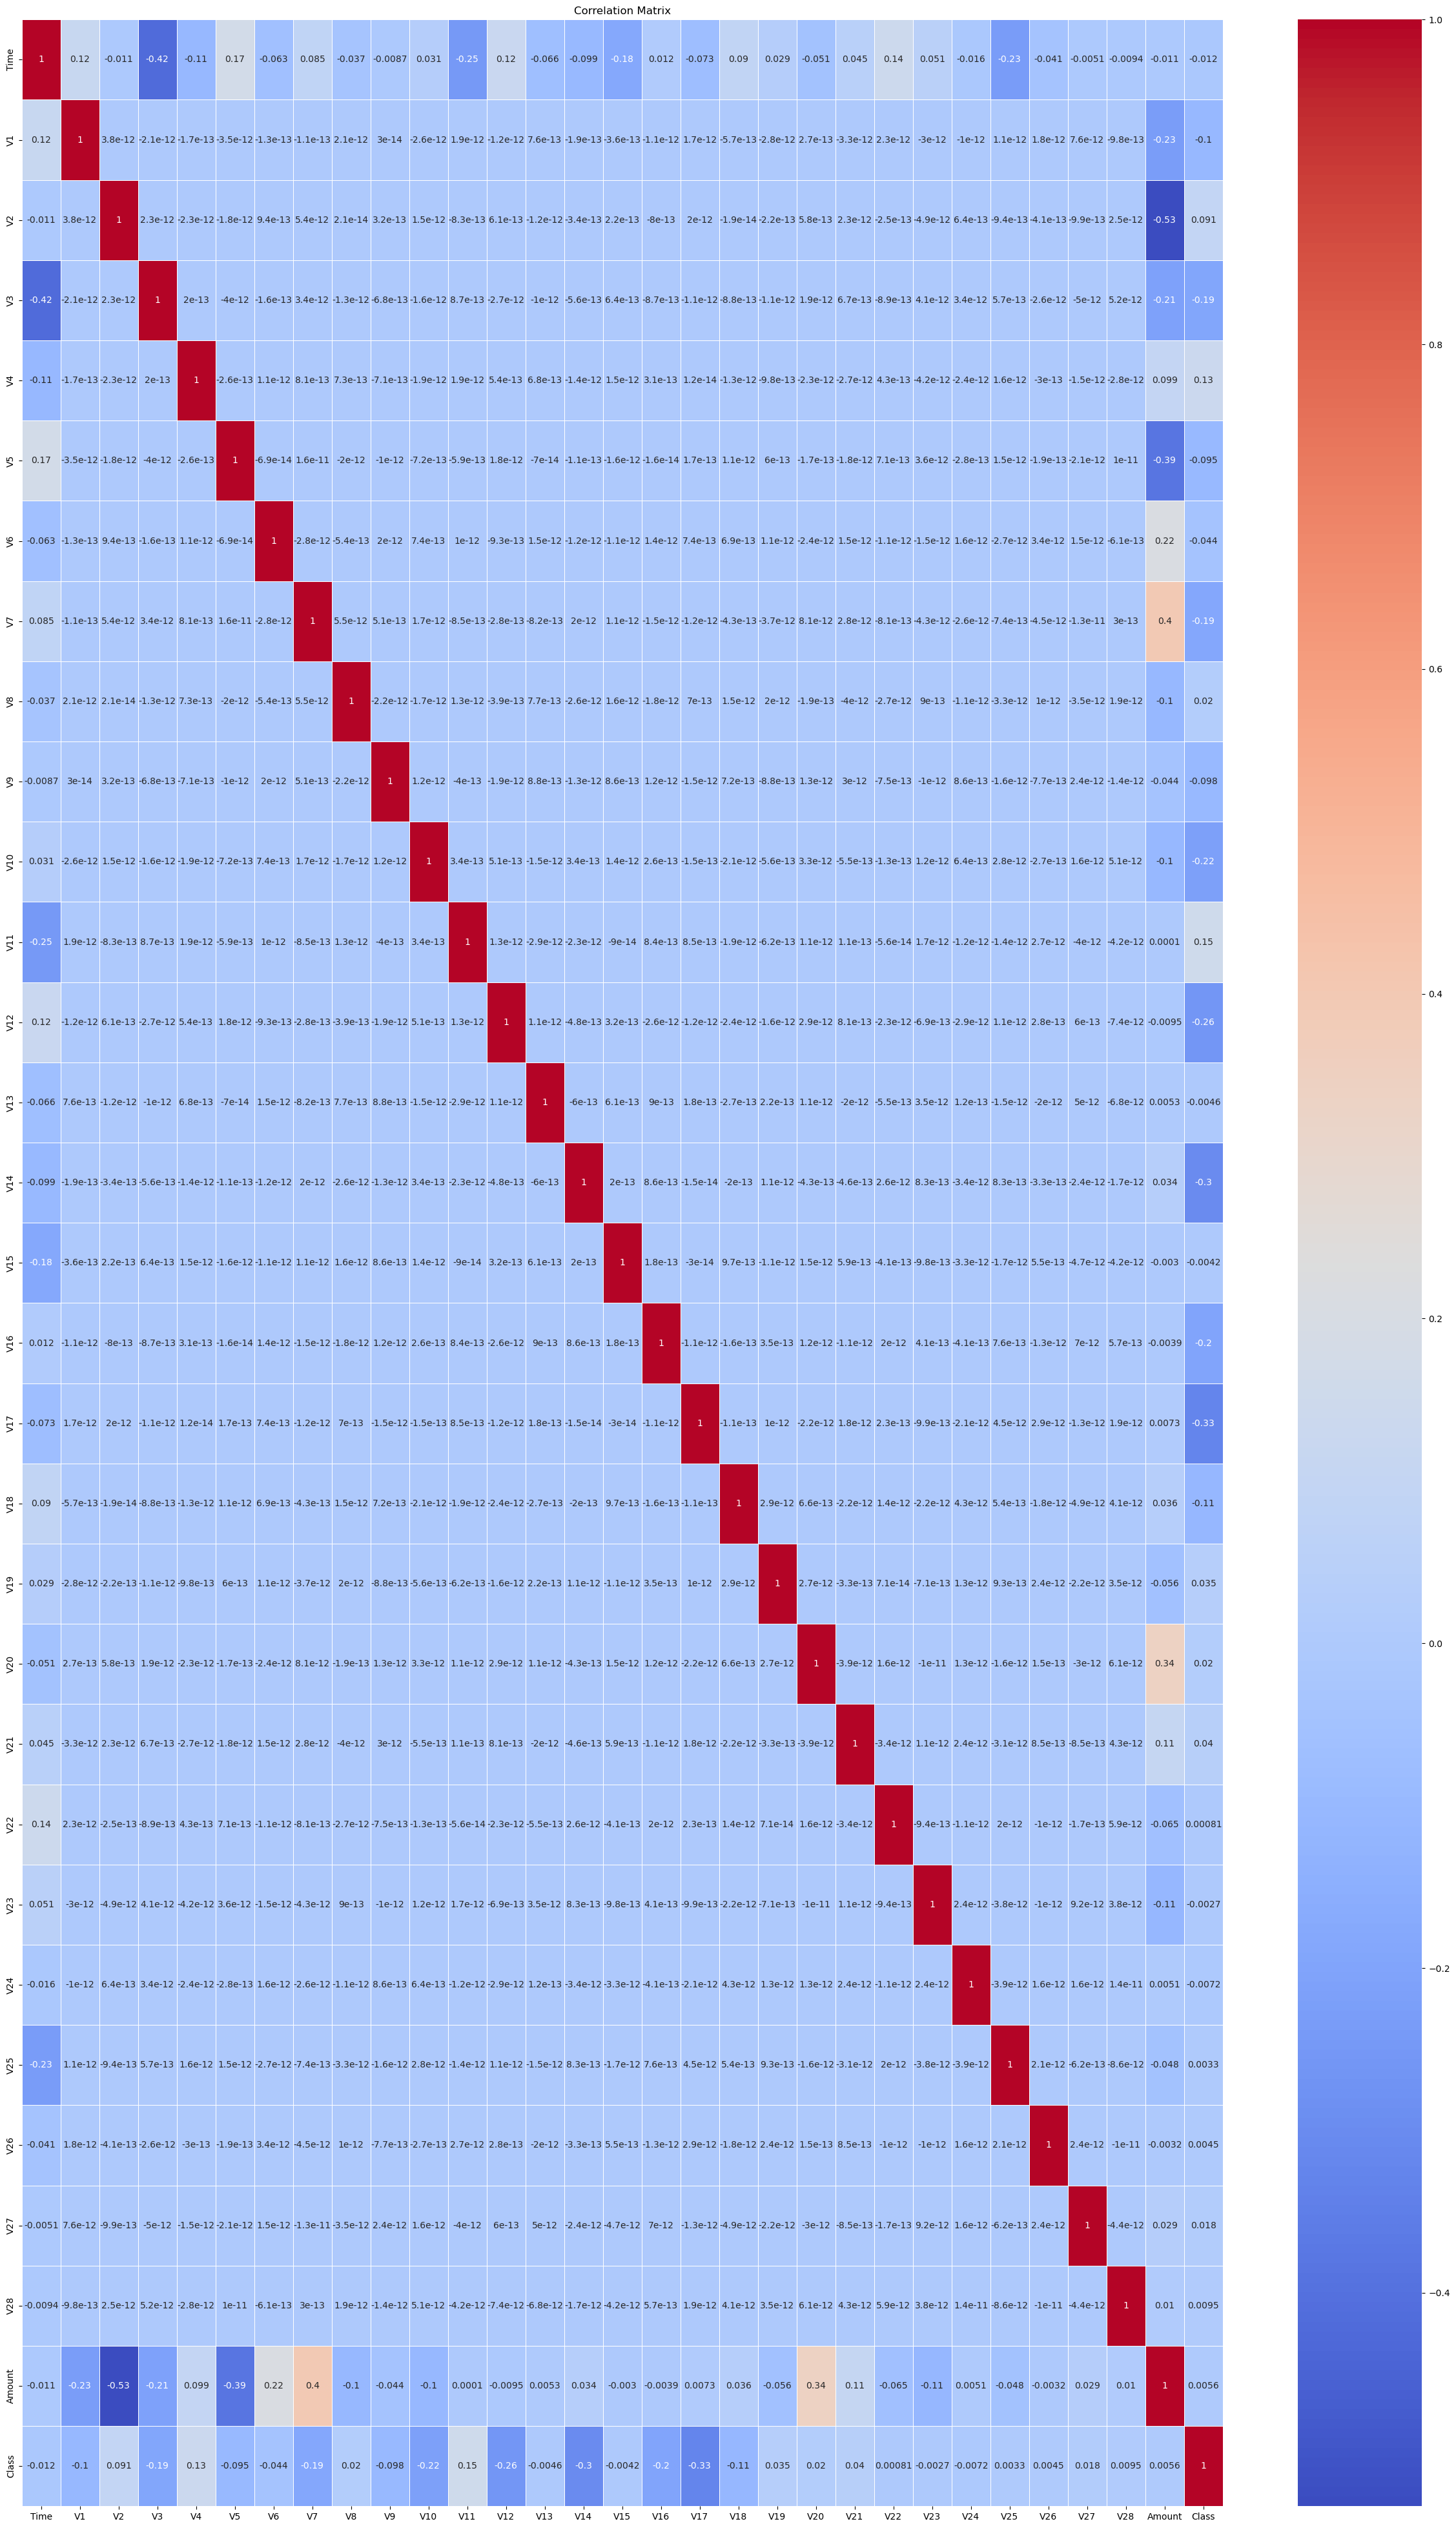

In [35]:
#Correlation Matrix Analysis
corr = df.corr()
plt.figure(figsize=(30,50))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

- In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount.
- Notice that if lower the negative correlations values are, the more likely the end result will be a fraudulent transaction. also if higher the positive correlation values are, the more likely the end result will be a fraudulent transaction.

In [36]:
#Standard Scaling
data = df.drop(['Time'], axis=1)
data['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


- After Standard Scaling, we can see Amount column with a scaled value ranging from 0-1.

In [40]:
# Convert DataFrame to CSV
data.to_csv('C:/Users/haris/Downloads/output.csv', index=False)

In [41]:
#Splitting the data into features and labels
X = data.drop("Class", axis=1).values
y = data["Class"].values


- Store the input attributes in variable X and output attribute in variable y

In [42]:
# Print the shape of X and y
print(X.shape)
print(y.shape)

(284807, 29)
(284807,)


## Balancing the data

In [44]:
# balance the class with equal distribution using SMOTE(Synthetic Minority Oversampling Technique)
over_sample = SMOTE()
x_smote, y_smote = over_sample.fit_resample(X, y)

In [53]:
# Check the new class distribution
from collections import Counter
print(f"Original dataset shape: {Counter(y)}")
print(f"Resampled dataset shape: {Counter(y_smote)}")

Original dataset shape: Counter({0: 284315, 1: 492})
Resampled dataset shape: Counter({0: 284315, 1: 284315})


Text(0, 0.5, 'Frequency')

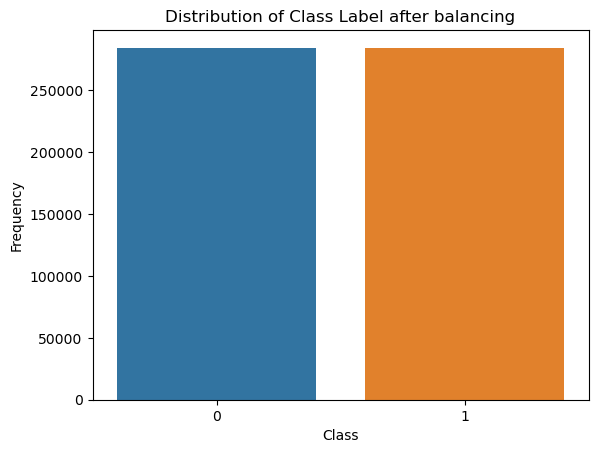

In [55]:
#Distribution of class label after balancing
sns.countplot(x=y_smote)
plt.title("Distribution of Class Label after balancing")
plt.xlabel("Class")
plt.ylabel("Frequency")


- Now the sample is equally distributed, the model will give weightage for both of these classes

## Splitting the data into training and testing

In [63]:
x_train, x_test, y_train, y_test = train_test_split(x_smote, y_smote, test_size=0.2, random_state=42)

In [64]:
print("Shape of Training Data:",x_train.shape)
print("Shape of Testing Data:",x_test.shape)

Shape of Training Data: (454904, 29)
Shape of Testing Data: (113726, 29)


## Model Training and Evaluation
- To perform Model Training we will use several different models like Logistic Regression, Random Forest, XGBoost, etc.All these models can be built feasibly using the algorithms provided by the scikit-learn package. Only for the XGBoost model, we are going to use the xgboost package.

The model used is Logistic Regression
Accuracy: 0.946256792641964
Precision: 0.9738057977494597
Recall: 0.9174038191519236
F1 Score: 0.9447637638723205
ROC AUC:  0.9463142443777239
Confusion Matrix:
  [[55344  1406]
 [ 4706 52270]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     56750
           1       0.97      0.92      0.94     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726



<Axes: >

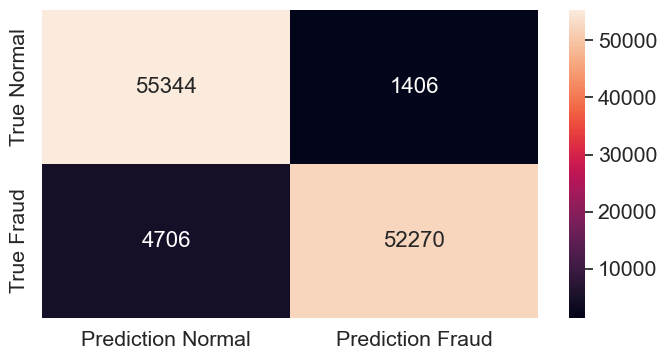

In [67]:
#Logistic Regression
lr_model = LogisticRegression()
# training
lr_model.fit(x_train, y_train)
# testing
y_pred = lr_model.predict(x_test)
lr_cm = confusion_matrix(y_test,y_pred)
print("The model used is Logistic Regression")
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("ROC AUC: ",roc_auc_score(y_test,y_pred))
print("Confusion Matrix:\n ",(lr_cm))
print(classification_report(y_test, y_pred))

lr_cm = pd.DataFrame(lr_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(lr_cm, annot=True,annot_kws={"size": 16},fmt='g')

The model used is Random Forest Classifier
Accuracy: 0.9998944832316269
Precision: 0.9997894293535481
Recall: 1.0
F1 Score: 0.9998947035906075
ROC AUC:  0.9998942731277534
Confusion Matrix:
  [[56738    12]
 [    0 56976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



<Axes: >

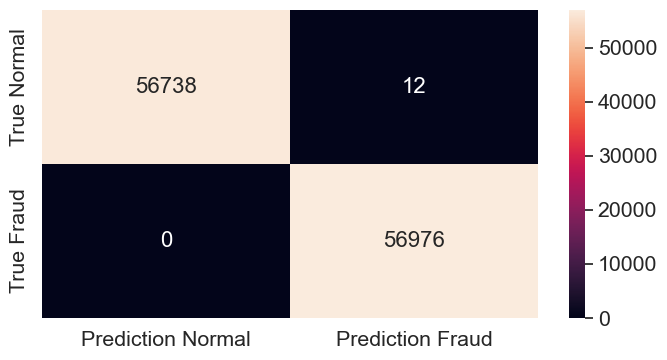

In [66]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42,n_jobs=-1)
# training
rf_model.fit(x_train, y_train)
# testing
y_pred = rf_model.predict(x_test)
rf_cm = confusion_matrix(y_test,y_pred)
print("The model used is Random Forest Classifier")
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("ROC AUC: ",roc_auc_score(y_test,y_pred))
print("Confusion Matrix:\n ",(rf_cm))
print(classification_report(y_test, y_pred))

rf_cm = pd.DataFrame(rf_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(rf_cm, annot=True,annot_kws={"size": 16},fmt='g')


The model used is XGBoost Classifier
Accuracy: 0.9996043121186009
Precision: 0.9992108170673962
Recall: 1.0
F1 Score: 0.9996052527698098
ROC AUC:  0.999603524229075
Confusion Matrix:
  [[56705    45]
 [    0 56976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



<Axes: >

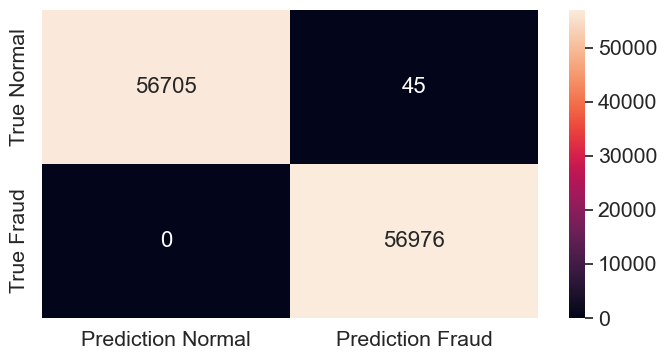

In [68]:
#XGBoost
xgb_model = XGBClassifier(random_state=42,n_jobs=-1)
# training
xgb_model.fit(x_train, y_train)
# testing
y_pred = xgb_model.predict(x_test)
xgb_cm = confusion_matrix(y_test,y_pred)
print("The model used is XGBoost Classifier")
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision:",precision_score(y_test, y_pred))
print("Recall:",recall_score(y_test, y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("ROC AUC: ",roc_auc_score(y_test,y_pred))
print("Confusion Matrix:\n ",(xgb_cm))
print(classification_report(y_test, y_pred))

xgb_cm = pd.DataFrame(xgb_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(xgb_cm, annot=True,annot_kws={"size": 16},fmt='g')

## Hyperparameter tuning for xgboost model

Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best parameters found:  {'colsample_bytree': 0.6, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 300, 'subsample': 1.0}
Accuracy: 0.9997889664632538
F1 Score: 0.9997894293535481
ROC AUC:  0.9997885462555066
confusion_matrix:
 [[56726    24]
 [    0 56976]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726



<Axes: >

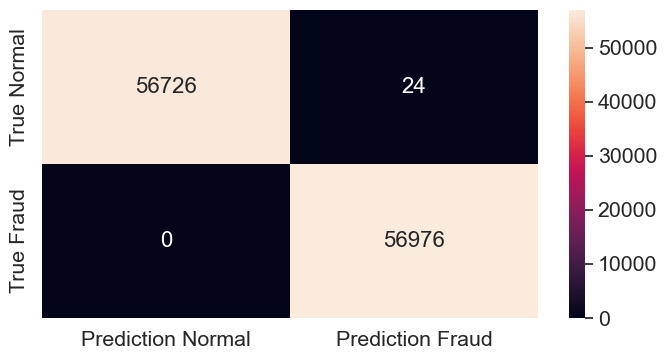

In [70]:
# Set up the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
}

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='f1',  # For imbalanced data, F1 score is a better metric
                           cv=3,
                           verbose=1,
                           n_jobs=-1)

# Fit the model
grid_search.fit(x_train, y_train)

# Best parameters from grid search
print("Best parameters found: ", grid_search.best_params_)

# Make predictions using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)

# Evaluation
xgbgs_cm = confusion_matrix(y_test, y_pred)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("F1 Score:",f1_score(y_test, y_pred))
print("ROC AUC: ",roc_auc_score(y_test,y_pred))
print("confusion_matrix:\n",(xgbgs_cm))
print(classification_report(y_test, y_pred))

xgbgs_cm = pd.DataFrame(xgbgs_cm, ['True Normal','True Fraud'],['Prediction Normal','Prediction Fraud'])
plt.figure(figsize = (8,4))
sns.set(font_scale=1.4)
sns.heatmap(xgbgs_cm, annot=True,annot_kws={"size": 16},fmt='g')


- This setup will help you find the best combination of hyperparameters for your XGBoost model by evaluating each combination using 3-fold cross-validation and optimizing for the F1 score.

## Conclusion:
- We found that XGBoost model with hyperparameter tuning performed the best to predict credit card frauds with an accuracy of 99.97% and an F1 score of 0.99.  As we know XGBoost requires fewer hyperparameters and is less sensitive to changes, making it easier to tune. Also XGBoost handles imbalanced data effectively and it prevents overfitting.

## Save models

In [72]:
# Save logistic regression model
import pickle
filename1 = 'lrmodel_creditcardfraud.sav'
pickle.dump(lr_model, open(filename1, 'wb'))
# Save Random Forest model
filename2 = 'rfmodel_creditcardfraud.sav'
pickle.dump(rf_model, open(filename2, 'wb'))
# Save XGBoost model
filename3 = 'xgbmodel_creditcardfraud.sav'
pickle.dump(xgb_model, open(filename3, 'wb'))
# Save XGBoost model with hyperparameter tuning
filename4 = 'bestmodel_creditcardfraud.sav'
pickle.dump(best_model, open(filename4, 'wb'))